In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os, sys

In [2]:
home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")

import imp

In [3]:
import data_utils
import monte_carlo
import mining_constants

In [4]:
## generate_weekly_df
du = data_utils.DataUtility("")
du._raw_network_price_df = pd.read_csv("../../data/raw_network_price.csv").drop("Unnamed: 0", axis="columns")
du._raw_network_price_df.time = pd.to_datetime(du._raw_network_price_df.time)
du._df_feature() 
du._aggregate_weekly_df() 

assert du._weekly_network_price_df.sum().sum() == 35545444113.88769

In [5]:
daily_df  = du._daily_network_price_df
weekly_df = du._weekly_network_price_df

In [6]:
sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

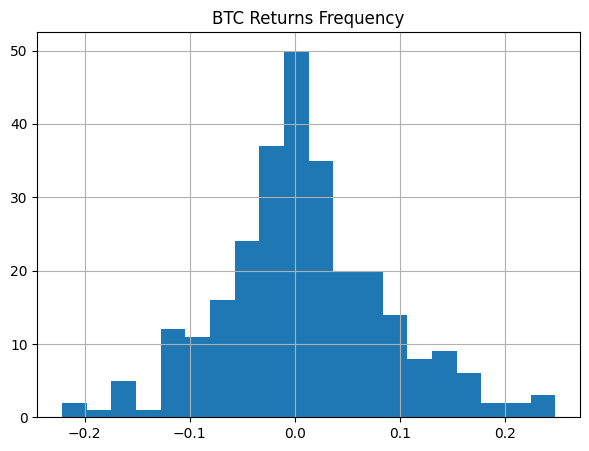

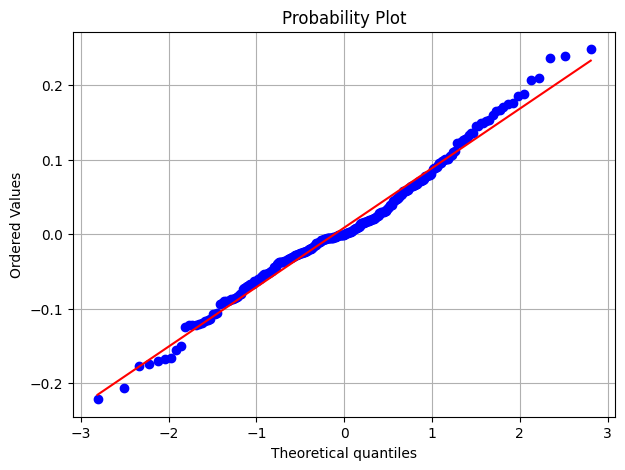

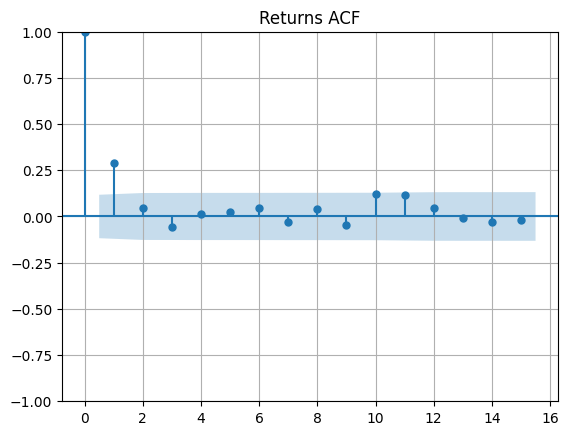

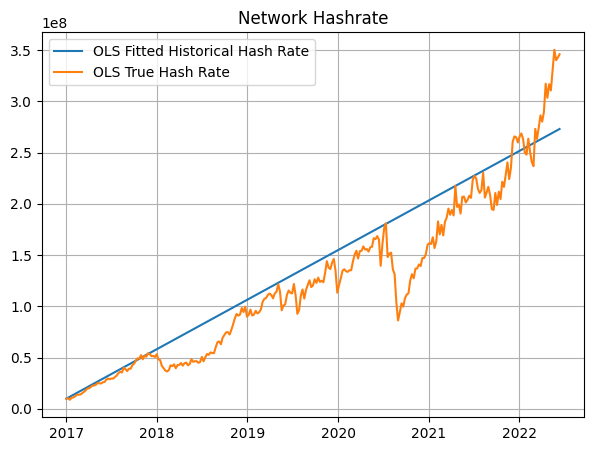

In [7]:
import analysis_paper
imp.reload(analysis_paper)

analysis_paper.btc_returns_hashrate_statistics(sp, weekly_df.close.pct_change(), max_qnt=0.01)